In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from IPython.core.display import display, HTML, Markdown

In [3]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
display(HTML("<style>.container { width:99% !important; }</style>"))

In [4]:
path_2019='../Dados/obitos-2019.csv'
path_2020='../Dados/obitos-2020.csv'

In [5]:
dados_2019 = pd.read_csv(path_2019)

dados_2020 = pd.read_csv(path_2020)

In [6]:
print(f"Forma da base de 2019: {dados_2019.shape}\nForma da base de 2020: {dados_2020.shape}")

Forma da base de 2019: (12385, 6)
Forma da base de 2020: (14921, 6)


In [7]:
dados_2019.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
4722,CE,OUTRAS,OUTRO,50 - 59,F,29
5347,RJ,INSUFICIENCIA_RESPIRATORIA,DOMICILIO,50 - 59,M,34
6546,PR,SEPTICEMIA,OUTRO,60 - 69,F,13
965,TO,OUTRAS,IGNORADO,< 9,F,1
7578,MT,INDETERMINADA,HOSPITAL,70 - 79,M,2


### Desafio 01 - Verificar como são classificados os dados

Disponivel o dicionario do registro de obito [aqui](https://transparencia.registrocivil.org.br/covid/dicionario_covid-19.pdf)

Fim do Desafio

In [8]:
#Verificando se tem todos os estados
len(dados_2019.uf.unique())

27

In [9]:
dados_2019['tipo_doenca'].unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [10]:
dados_2019['tipo_doenca'].value_counts()

OUTRAS                        3847
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2324
SEPTICEMIA                    2065
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [11]:
dados_2020['tipo_doenca'].value_counts()

OUTRAS                        3801
INSUFICIENCIA_RESPIRATORIA    2334
PNEUMONIA                     2214
COVID                         2112
SEPTICEMIA                    2031
INDETERMINADA                 1347
SRAG                          1082
Name: tipo_doenca, dtype: int64

### Desafio 02 - Fazer o somatorio dos valores e não a contagem

In [12]:
dados_2019.groupby('tipo_doenca').sum()

,total
tipo_doenca,
COVID,1
INDETERMINADA,6988
INSUFICIENCIA_RESPIRATORIA,100608
OUTRAS,660740
PNEUMONIA,226352
SEPTICEMIA,175533
SRAG,1498


In [13]:
dados_2020.groupby('tipo_doenca').sum()

,total
tipo_doenca,
COVID,195787
INDETERMINADA,9713
INSUFICIENCIA_RESPIRATORIA,98978
OUTRAS,690474
PNEUMONIA,182081
SEPTICEMIA,162864
SRAG,16563


In [14]:
round(dados_2020.groupby('tipo_doenca').sum()/dados_2019.groupby('tipo_doenca').sum(),2)

,total
tipo_doenca,
COVID,195787.00
INDETERMINADA,1.39
INSUFICIENCIA_RESPIRATORIA,0.98
OUTRAS,1.05
PNEUMONIA,0.80
SEPTICEMIA,0.93
SRAG,11.06


### Desafio 03 - Explorar os outros campos da base

In [23]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()
    
    lista = int(total_2019.loc[causa]) , int(total_2020.loc[causa])
    
    plt.figure(figsize=(8,6))
    dados = pd.DataFrame({'Total':lista,
                         'Ano':[2019,2020]})
    plt.title('Obitor por '+causa)
    
    
    
    sns.barplot(x='Ano', y='Total',data=dados)


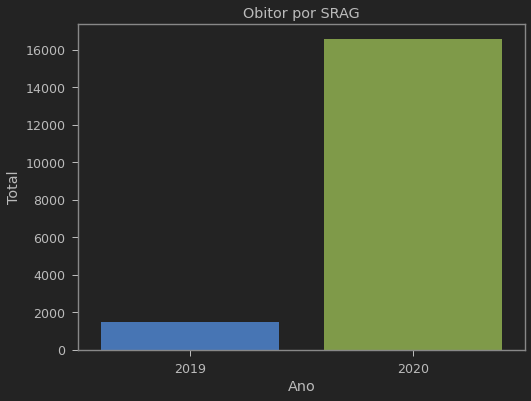

In [24]:
grafico_comparativo('SRAG')